### Name: Umair Hussain
### UTORID: hussa906

### Part 1 Question 1
$$\text{exp}\left\{-\frac{1}{2}\left(\left(\sum^n_{i=1}\phi(x_i-\theta)^2\right)+\tau(\theta-\theta_0)^2\right)\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}(x_i^2-2x_i\theta+\theta^2)+\tau(\theta^2-2\theta\theta_0+\theta_0^2)\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}x_i^2-2\theta\phi\sum^n_{i=1}x_i+n\phi\theta^2+\tau\theta^2-2\tau\theta\theta_0+\tau\theta_0^2\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\left(n\phi\theta^2+\tau\theta^2\right)+(-2\theta\phi\sum^n_{i=1}x_i-2\tau\theta\theta_0)+\phi\sum^n_{i=1}x_i^2+\tau\theta_0^2\right]\right\}$$
$$
= \text{exp}\left\{-\frac{1}{2}\bigg[\theta^2 \Big(\tau +n \phi\Big) - \theta\Big(2\tau\theta_{0} +2\phi\sum_{i = 1}^{n}  x_{i}\Big)  + \tau\theta_{0}^2 + \phi \sum_{i = 1}^{n} x_i^2 \bigg]\right\}
$$
$$
= \text{exp}\left\{-\frac{1}{2} \big(\tau +n \phi\big)\bigg[\theta^2  - \theta\Big(\frac{2\tau\theta_{0} +2\phi\sum_{i = 1}^{n}  x_{i}}{\tau + n\phi}\Big)  + \Big(\frac{\tau\theta_{0}^2 + \phi \sum_{i = 1}^{n} x_i^2}{\tau + n\phi}\Big) \bigg]\right\}
$$
$$
=
\text{exp}\left\{-\frac{1}{2} \big(\tau +n \phi\big)
\bigg[\Big(\theta^2  -
\theta\Big[\frac{2\tau\theta_{0} +2\phi\sum_{i = 1}^{n}  x_{i}}{\tau + n\phi}\Big] +
\Big[\frac{\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i}{\tau + n\phi} \Big]^2\Big) -
\Big(\frac{\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i}{\tau + n\phi} \Big)^2 + 
\Big(\frac{\tau\theta_{0}^2 + \phi \sum_{i = 1}^{n} x_i^2}{\tau + n\phi}\Big) \bigg]\right\}
$$
$$=\text{exp}\left\{-\frac{1}{2} \big(\tau +n \phi\big)
\bigg[\Big(\theta -
\Big[\frac{\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i}{\tau + n\phi} \Big]\Big)^2 -
\Big(\frac{\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i}{\tau + n\phi} \Big)^2 + 
\Big(\frac{\tau\theta_{0}^2 + \phi \sum_{i = 1}^{n} x_i^2}{\tau + n\phi}\Big) \bigg]\right\}
$$
The two terms on the right are constant since they do not involve $\theta$
$$
\propto \text{exp}\left\{-\frac{1}{2} \big(\tau +n \phi\big)
\bigg[\Big(\theta -
\Big[\frac{\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i}{\tau + n\phi} \Big]\Big)^2\right\}
$$

$$
=\text{exp}\left\{-\frac{1}{2} \big(\tau +n \phi\big)
\bigg[\Big(\theta -
\frac{1}{\tau + n\phi}
\Big[\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i \Big]\Big)^2\right\} \blacksquare
$$
Thus showing that:
$$\text{exp}\left\{-\frac{1}{2}\bigg[\Big(\sum_{i = 1}^{n} \phi(x_i - \theta)^2 \Big) + \tau(\theta - \theta_{0})^2 \bigg]\right\}
$$
$$ \propto
\text{exp}
\left\{-\frac{1}{2} \big(\tau +n \phi\big)
\bigg[\Big(\theta -
\frac{1}{\tau + n\phi}
\Big[\tau\theta_0 + \phi \sum_{i = 1}^{n}x_i \Big]\Big)^2 \bigg]\right\}
$$

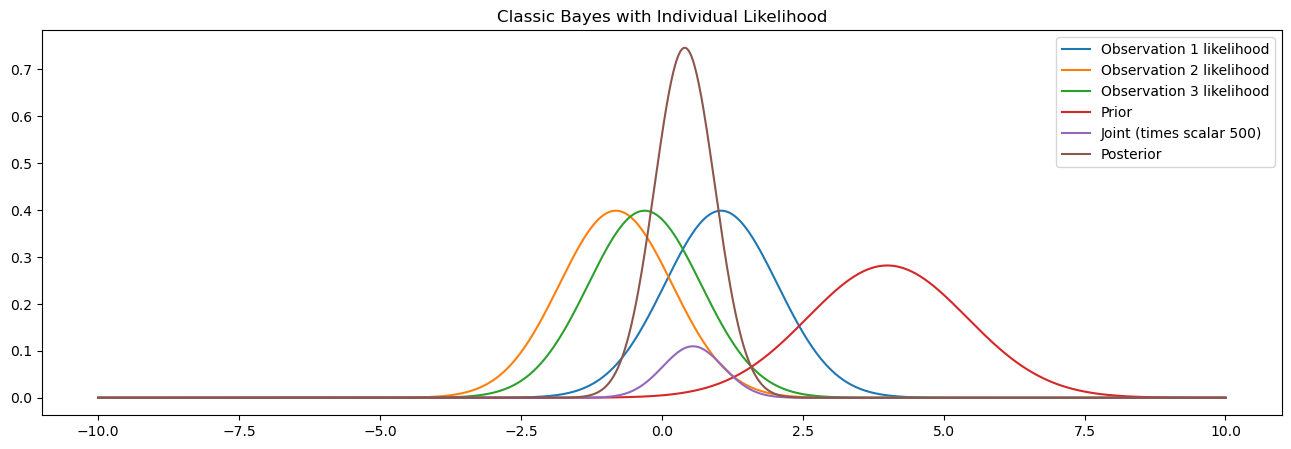

In [9]:
# Part 2 Question 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

likelihoods = []
for i in range(n):
    xi = stats.norm(loc=0, scale=1).rvs(1)[0]
    likelihood = stats.norm(loc=xi, scale=1).pdf(parameter_domain)
    likelihoods.append(likelihood)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
joint = np.prod(likelihoods, axis=0) * prior * 500
posterior = stats.norm(loc=(tau * theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16, 5))
for i, likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, likelihood, label=f"Observation {i+1} likelihood")

plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, joint, label="Joint (times scalar 500)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.legend()
plt.title("Classic Bayes with Individual Likelihoods")
plt.show()

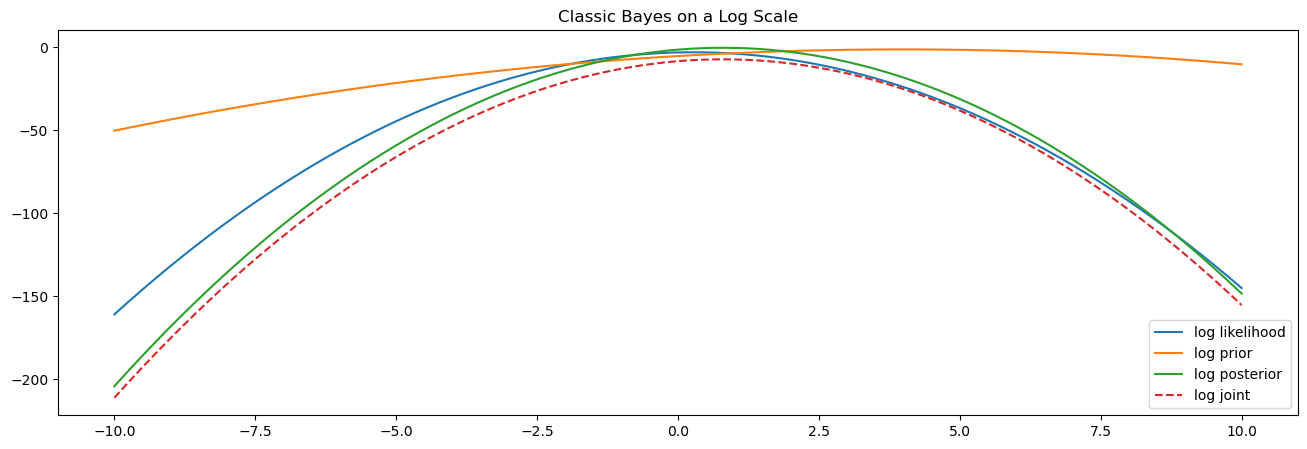

In [3]:
# Part 2 Question 2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3; x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2

parameter_domain = np.linspace(-10,10,1001)
# Build log Prior
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)


# Build a single log-likelihood 
log_likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) 
# Build log joint and posterior
log_joint = log_likelihood + log_prior # addition from multiplication
log_posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

# Plot everything in log scale
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, log_likelihood, label="log likelihood")
plt.plot(parameter_domain, log_prior, label="log prior")
plt.plot(parameter_domain, log_posterior, label="log posterior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="log joint")
plt.legend()
plt.title("Classic Bayes on a Log Scale")
plt.show()

### Part 2 Question 3
$p(\theta)\propto1$
The posterior distribution of a normal likelihood with $p(\theta)\propto1$ would still be normal. Lets define the prior as $P(\theta) = k$ for some constant k. The derivation uses similar techniques to the one found in part 1:

$$p(\theta|x) \propto{} p(\theta,x) = p(x|\theta)p(\theta)$$
$$=\left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right]\times{k}$$
$$\propto\exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)\right]$$
expand
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}x_i^2-2\theta\phi\sum^n_{i=1}x_i+n\phi\theta^2\right]\right\}$$
$$\propto\text{exp}\left\{-\frac{1}{2}\left[n\phi\theta^2-2\theta\phi\sum^n_{i=1}x_i+\frac{\phi}{n}(\sum^n_{i=1}x_i)^2\right]\right\}$$
$$\propto\text{exp}\left\{-\frac{1}{2}n\phi\left[\theta^2-\frac{2\theta}{n}\sum^n_{i=1}x_i+\frac{1}{n^2}(\sum^n_{i=1}x_i)^2\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}n\phi\left[\theta-\frac{1}{n}\sum^n_{i=1}x_i\right]^2\right\}\blacksquare$$
This results in a normal distribution. So we can say that the posterior distribution of a normal likelihood with $p(\theta)\propto1$ would still result in a normal distribution.

### Part 2 Question 4
Bayes Rule:
$$p(\theta|x)=\frac{p(x|\theta)p(\theta)}{p(x)}$$
where likelihood is $p(x|\theta)$, and the posterior as $p(\theta|x)$.

Logarithmic Transformation:
$${log}(p(\theta|x))=log(p(x|\theta))+log(p(\theta))-log(p(x))$$
When using an improper prior, $log(p(\theta))$ may lack a finite value upon integration over the parameter space. Therefore:
$$log(p(\theta|x))=log(p(x|\theta))-log(p(x))$$
Thus showing that when an improper prior is used the only difference between the log posterior and log liklihood is that of the log normalizing constant.